In [455]:
import matplotlib.pyplot as pt
import pandas as pd
import numpy as np
pt.style.use('ggplot')

In [456]:
#import original data and define clear data function: cleardata()
xls = pd.ExcelFile('SIPRI-Milex-data-49-2016.xlsx')
def cleardata(x):
    # Transfer all missing value to NaN
    x=x.replace('xxx',np.NaN).replace('. .',np.NaN)
    #select data from 2008-2016 dataset
    a=len(x.columns)
    x=x.iloc[:,(a-9):a]
    #creat new variable 'average' for each dataset
    x['average']=x.mean(axis=1)
    # save 3 decimal
    x=x.round(3)
    # Change the name of Russia to paried four country
    x=x.rename(index={'Russian Federation': 'Russia'}).rename(index={'USSR/Russia': 'Russia'})
    x.head(10)
    return x

In [457]:
# import data:Current_USD and clear data
Current_USD = xls.parse('Current USD',index_col=0,skiprows=5, skipfooter=8)
Current_USD=cleardata(Current_USD)
Current_USD.head(10)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,average
Country,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,5172.337,5280.588,5671.309,8652.237,9326.287,10161.588,9724.380,10412.714,10217.082,8290.947
Libya,1100.069,NaN,NaN,NaN,2987.413,3964.690,3755.659,NaN,NaN,2951.958
Morocco,2944.958,3055.069,3160.805,3342.699,3402.701,4065.552,4048.611,3268.363,3327.032,3401.755
Tunisia,578.911,564.776,571.189,715.240,681.226,759.359,908.357,979.494,975.938,748.277
Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,3163.591,3311.193,3500.795,3639.496,4144.635,6090.752,6841.864,3608.291,2824.260,4124.986
Benin,64.725,NaN,NaN,NaN,78.223,86.003,92.991,90.896,98.137,85.162


In [458]:
# import data:Share_GDP and clear data
Share_GDP = xls.parse('Share of GDP',index_col=0,skiprows=5, skipfooter=8)
Share_GDP=cleardata(Share_GDP)*100
Share_GDP.head(10)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,average
Country,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,3.0,3.8,3.5,4.3,4.5,4.8,5.5,6.3,6.7,4.7
Libya,1.2,NaN,NaN,NaN,3.3,5.5,7.8,NaN,NaN,4.4
Morocco,3.2,3.3,3.4,3.3,3.5,3.8,3.7,3.2,3.2,3.4
Tunisia,1.3,1.3,1.3,1.6,1.5,1.6,1.9,2.2,2.3,1.7
Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,3.7,4.3,4.2,3.5,3.6,4.8,5.4,3.5,3.7,4.1
Benin,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.2,1.2,1.1


In [459]:
#import and clear data: Per capita
Per_capita= xls.parse('Per capita',index_col=0,skiprows=6, skipfooter=8)
Per_capita=cleardata(Per_capita)
Per_capita.head(10)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,average
Country,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,148.583,149.162,157.378,235.646,249.103,266.107,249.764,262.506,252.738,218.998
Libya,179.661,NaN,NaN,NaN,475.445,632.732,600.043,NaN,NaN,471.970
Morocco,93.936,96.329,98.444,102.751,103.162,121.531,119.353,95.073,95.507,102.899
Tunisia,55.621,53.675,53.687,66.479,62.604,68.997,81.612,87.039,85.777,68.388
Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,159.437,161.363,164.977,165.867,182.699,259.753,282.400,144.205,109.259,181.107
Benin,7.213,NaN,NaN,NaN,7.784,8.332,8.774,8.355,8.779,8.206


In [460]:
#select top15 countries base on average value of military expenditure from 2008 to 2016
sorting=Current_USD.sort_values('average', ascending=False)
top15_expenditure=sorting.head(15)
top15_name=sorting.head(15).index
top15_name

Index(['USA', 'China, P.R.', 'Russia', 'France', 'Saudi Arabia', 'UK', 'Japan',
       'India', 'Germany', 'Italy', 'Korea, South', 'Brazil', 'Australia',
       'Canada', 'Spain'],
      dtype='object', name='Country')

In [461]:
Current_USD.loc[top15_name]

,2008,2009,2010,2011,2012,2013,2014,2015,2016,average
Country,,,,,,,,,,
USA,621131.000,668567.000,698180.000,711338.000,684780.000,639704.000,609914.000,596009.639,611186.443,648978.898
"China, P.R.",86362.099,105644.215,115711.781,137967.304,157390.377,179880.451,200772.204,214093.070,215175.930,156999.715
Russia,56183.785,51532.117,58720.228,70237.524,81469.400,88352.896,84696.505,66418.708,69245.309,69650.719
France,66009.448,66884.029,61781.748,64600.927,60035.154,62417.099,63613.569,55342.132,55745.476,61825.509
Saudi Arabia,38222.933,41267.200,45244.533,48530.933,56497.867,67020.000,80762.400,87185.867,63672.800,58711.615
UK,65619.450,57914.628,58082.849,60270.436,58495.657,56861.760,59182.859,53862.185,48252.518,57615.816
Japan,46361.468,51465.158,54655.451,60762.214,60011.530,49023.932,46634.511,41103.226,46126.328,50682.647
India,33002.377,38722.154,46090.446,49633.816,47216.920,47403.529,50914.108,51295.484,55923.170,46689.111
Germany,48081.444,47470.073,46255.521,48140.348,46470.871,45930.541,46102.673,39812.576,41067.465,45481.279


In [462]:
Share_GDP.loc[top15_name]

,2008,2009,2010,2011,2012,2013,2014,2015,2016,average
Country,,,,,,,,,,
USA,4.2,4.6,4.7,4.6,4.2,3.8,3.5,3.3,3.3,4.0
"China, P.R.",1.9,2.1,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9
Russia,3.3,4.1,3.8,3.7,4.0,4.2,4.5,4.9,5.3,4.2
France,2.3,2.5,2.3,2.3,2.2,2.2,2.2,2.3,2.3,2.3
Saudi Arabia,7.4,9.6,8.6,7.2,7.7,9.0,10.7,13.5,10.4,9.3
UK,2.4,2.5,2.4,2.3,2.2,2.1,2.0,1.9,1.9,2.2
Japan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
India,2.6,2.9,2.7,2.7,2.5,2.5,2.5,2.4,2.5,2.6
Germany,1.3,1.4,1.4,1.3,1.3,1.2,1.2,1.2,1.2,1.3


In [463]:
Per_capita.loc[top15_name]

,2008,2009,2010,2011,2012,2013,2014,2015,2016,average
Country,,,,,,,,,,
USA,2040.019,2176.098,2253.094,2277.080,2175.290,2017.129,1909.271,1852.264,1886.164,2065.157
"China, P.R.",65.096,79.205,86.290,102.336,116.122,132.021,146.609,155.585,155.744,115.445
Russia,392.556,360.046,410.177,490.446,568.573,616.269,590.510,462.987,483.114,486.075
France,1059.380,1067.737,981.268,1021.061,944.516,977.642,992.083,859.412,862.358,973.940
Saudi Arabia,1429.277,1505.581,1610.662,1685.779,1915.439,2219.128,2614.808,2764.262,1978.189,1969.236
UK,1063.703,930.787,926.115,954.175,920.123,889.081,919.969,832.288,741.312,908.617
Japan,364.139,404.153,429.277,477.492,472.012,386.061,367.796,324.738,365.395,399.007
India,27.569,31.892,37.442,39.788,37.367,37.049,39.307,39.125,42.140,36.853
Germany,596.057,589.546,575.065,598.577,577.436,570.099,571.665,493.411,509.330,564.576


In [464]:
# In this part, I defined a function: plottrend contains two parameters. This first 
#parameter is to define the name of country that you want to draw. The second parameter
#defined the category of data. To describe the trend of military spending by plotting 
#trend chart
def plottrend(name_country,data):
    data=data.loc[name_country][:-1]
    data.plot()

In [485]:
# def function of plotting trend for several countryies

def trendcompare(country_name,data):
    pt.figure(figsize=(10,10))
    for country in country_name:
        plottrend(country,data)
        pt.legend(country_name)

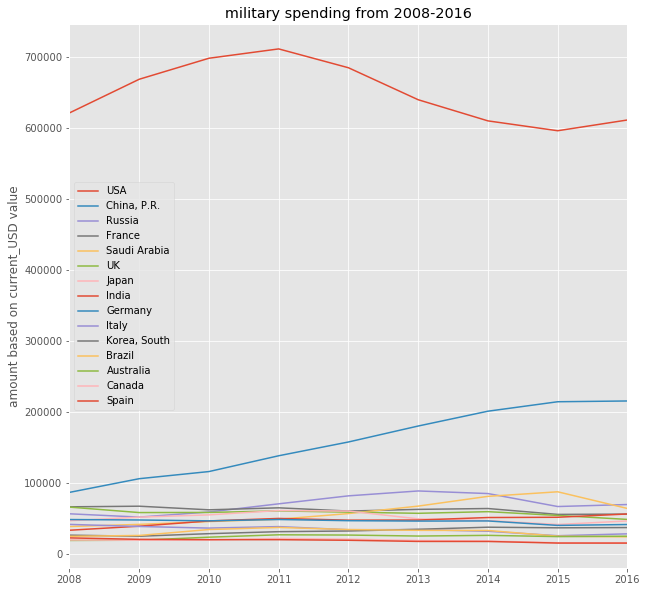

In [486]:
trendcompare(top15_name,Current_USD)
pt.ylabel('amount based on current_USD value')
pt.title('military spending from 2008-2016')
pt.show()

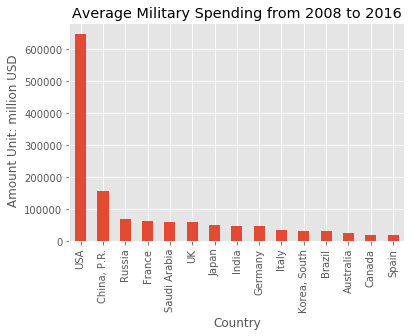

In [467]:
Current_USD.loc[top15_name]['average'].plot(kind='bar')
pt.ylabel(' Amount Unit: million USD')
pt.title('Average Military Spending from 2008 to 2016')
pt.show()

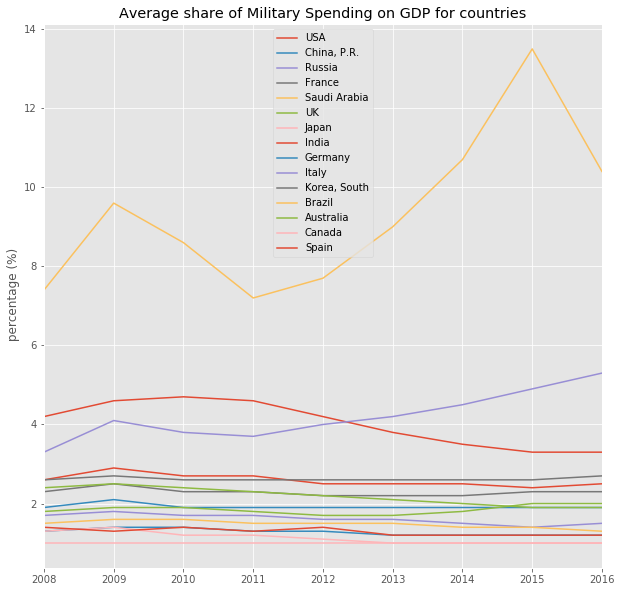

In [468]:
trendcompare(top15_name,Share_GDP)
pt.ylabel(' percentage (%)')
pt.title('Average share of Military Spending on GDP for countries')
pt.show()

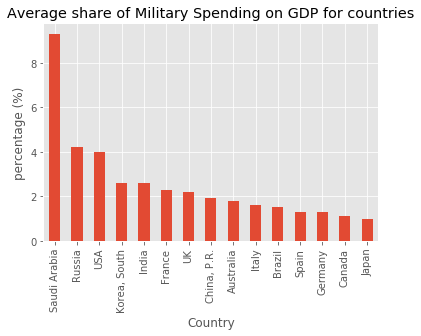

In [469]:
Share_GDP.loc[top15_name]['average'].sort_values(ascending=False).plot(kind='bar')
pt.ylabel('percentage (%)')
pt.title('Average share of Military Spending on GDP for countries')
pt.show()

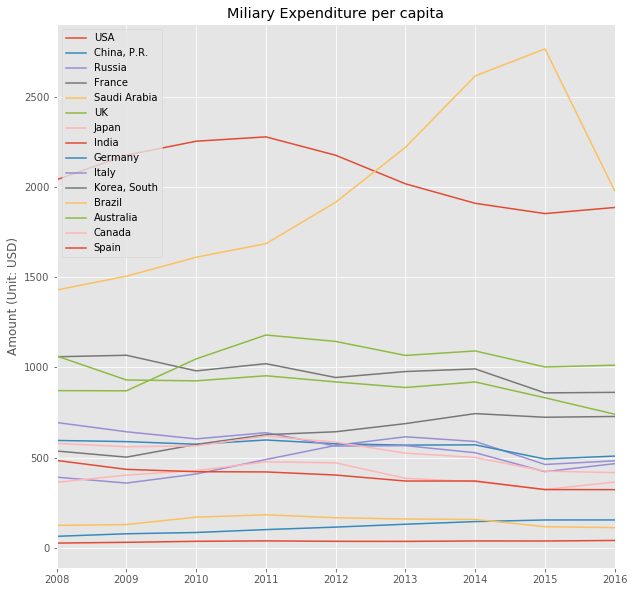

In [470]:
trendcompare(top15_name,Per_capita)
pt.ylabel('Amount (Unit: USD)')
pt.title('Military Expenditure per capita')
pt.show()

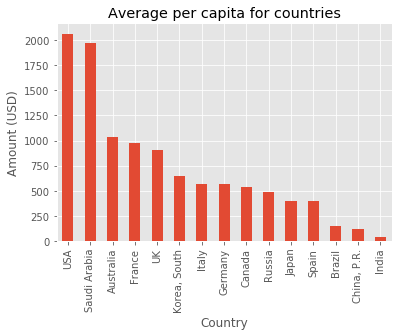

In [471]:
Per_capita.loc[top15_name]['average'].sort_values(ascending=False).plot(kind='bar')
pt.ylabel('Amount (USD)')
pt.title('Average per capita for countries')
pt.show()

In [472]:
#def plot bar graph for diff between end year and begin year
def change(begin,end,dataset,countryname):
    data=dataset.loc[countryname]
    change=data.loc[:,end]-data.loc[:,begin]
    change=change/8
    change.plot(kind='bar')
    pt.title('bar chart')
    pt.show()

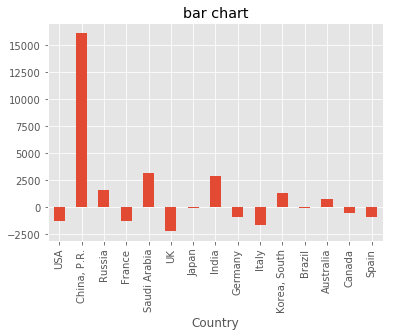

In [473]:
change(2008,2016,Current_USD,top15_name)

In [475]:
#define function -diff_year: to calculate the difference between one year with prior year
def diff_year(year,dataset,countryname):
    data=dataset.loc[countryname]
    change=data.loc[:,year]-data.loc[:,year-1]
    return change

In [476]:
# Define function diff_data: to transfer the dataset to newdata that contains difference 
#between adjacent columns.
def diff_data(dataset,countryname):
    result=dataset.loc[top15_name].iloc[:,0].reset_index()
    for year in range(2009,2017,1):
        result['{}/{}'.format(year,year-1)]=diff_year(year,dataset,countryname).values
    return result.set_index('Country').iloc[:,1:]

In [477]:
# Growth compared with prior year
diff_USD_fixed=diff_data(Current_USD, top15_name)
diff_USD_fixed

,2009/2008,2010/2009,2011/2010,2012/2011,2013/2012,2014/2013,2015/2014,2016/2015
Country,,,,,,,,
USA,47436.000,29613.000,13158.000,-26558.000,-45076.000,-29790.000,-13904.361,15176.804
"China, P.R.",19282.116,10067.566,22255.523,19423.073,22490.074,20891.753,13320.866,1082.860
Russia,-4651.668,7188.111,11517.296,11231.876,6883.496,-3656.391,-18277.797,2826.601
France,874.581,-5102.281,2819.179,-4565.773,2381.945,1196.470,-8271.437,403.344
Saudi Arabia,3044.267,3977.333,3286.400,7966.934,10522.133,13742.400,6423.467,-23513.067
UK,-7704.822,168.221,2187.587,-1774.779,-1633.897,2321.099,-5320.674,-5609.667
Japan,5103.690,3190.293,6106.763,-750.684,-10987.598,-2389.421,-5531.285,5023.102
India,5719.777,7368.292,3543.370,-2416.896,186.609,3510.579,381.376,4627.686
Germany,-611.371,-1214.552,1884.827,-1669.477,-540.330,172.132,-6290.097,1254.889


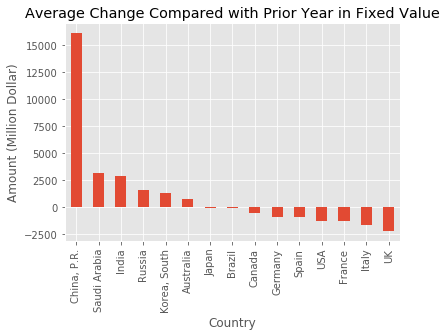

In [489]:
diff_USD_fixed.mean(axis=1).sort_values(ascending=False).plot(kind='bar')
pt.ylabel('Amount (Million Dollar)')
pt.title( 'Average Growth Compared with Prior Year in Fixed Value')
pt.show()

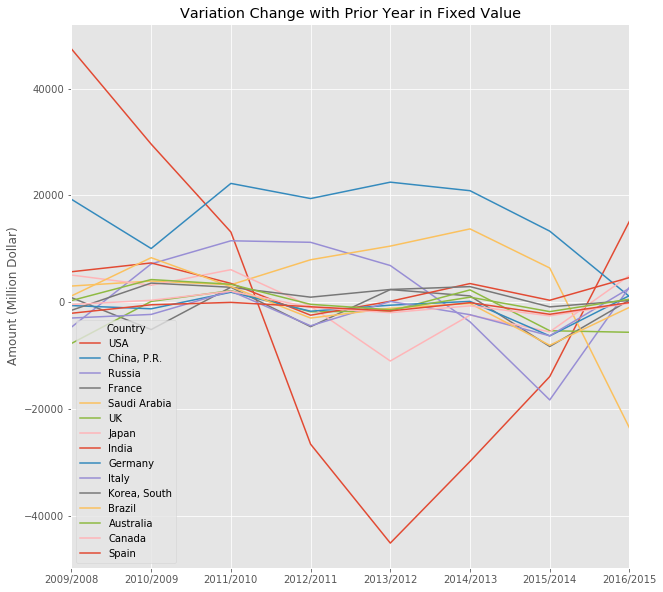

In [490]:
diff_USD_fixed.T.plot(figsize=(10,10))
pt.ylabel('Amount (Million Dollar)')
pt.title( 'Variation Change with Prior Year in Fixed Value')
pt.show()

In [480]:
# Define function perc_data: to transfer the dataset to newdata that contains
#variation of data based on prior year in percentage.
def perc_year(year,dataset,countryname):
    data=dataset.loc[countryname]
    change=(data.loc[:,year]-data.loc[:,year-1])/data.loc[:,year-1]
    return change
def perc_data(dataset,countryname):
    result=dataset.loc[countryname].iloc[:,0].reset_index()
    for year in range(2009,2017,1):
        result['{}/{}'.format(year,year-1)]=perc_year(year,dataset,countryname).values
    return result.set_index('Country').iloc[:,1:]*100

In [481]:
#growth rate compared with prior year in percentage
diff_USD_percent=perc_data(Current_USD,top15_name)
diff_USD_percent

,2009/2008,2010/2009,2011/2010,2012/2011,2013/2012,2014/2013,2015/2014,2016/2015
Country,,,,,,,,
USA,7.637036,4.429324,1.884614,-3.733528,-6.582552,-4.656841,-2.279725,2.546402
"China, P.R.",22.327058,9.529690,19.233584,14.078026,14.289358,11.614243,6.634816,0.505789
Russia,-8.279378,13.948798,19.613848,15.991276,8.449180,-4.138394,-21.580344,4.255730
France,1.324933,-7.628549,4.563126,-7.067659,3.967584,1.916895,-13.002630,0.728819
Saudi Arabia,7.964504,9.638001,7.263640,16.416198,18.623947,20.504924,7.953537,-26.968897
UK,-11.741674,0.290464,3.766322,-2.944692,-2.793194,4.082003,-8.990228,-10.414852
Japan,11.008474,6.198938,11.173200,-1.235445,-18.309145,-4.873989,-11.860926,12.220700
India,17.331409,19.028621,7.687862,-4.869454,0.395216,7.405733,0.749058,9.021625
Germany,-1.271532,-2.558564,4.074815,-3.467937,-1.162728,0.374766,-13.643671,3.151991


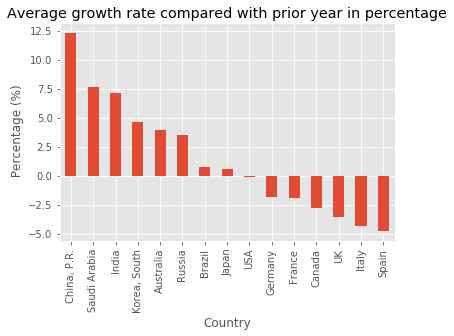

In [492]:
diff_USD_percent.mean(axis=1).sort_values(ascending=False).plot(kind='bar')
pt.ylabel(' Percentage (%)')
pt.title('Average growth rate compared with prior year in percentage')
pt.show()

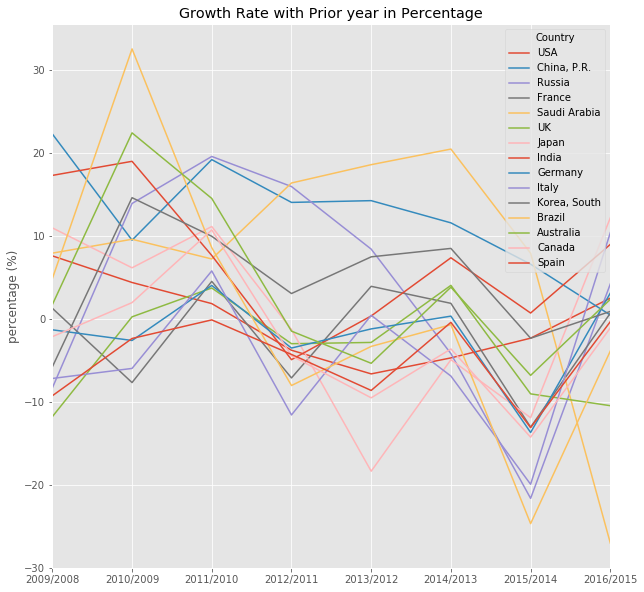

In [491]:
perc_data(Current_USD,top15_name).T.plot(figsize=(10,10))
pt.ylabel('percentage (%)')
pt.title( 'Growth Rate with Prior year in Percentage')
pt.show()